In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

## Part 1: EDA

In [4]:
gtd = pd.read_excel('GTD.xlsx')

In [5]:
gtd.region.value_counts()

10    40422
6     37841
3     18628
8     16020
11    13434
5     10360
2     10337
9      4892
1      3268
4       786
7       538
12      246
Name: region, dtype: int64

In [6]:
gtd = gtd.rename(columns={'iyear':'year', 'imonth':'month', 'iday':'day'})

In [7]:
#Get rid of zeroes in month and day
gtd = gtd[gtd.month != 0]

In [8]:
gtd = gtd[gtd.day != 0] 

In [ ]:
gtd.attacktype1.value_counts()

In [ ]:
# 1. Assassination
# 2. Armed assault 
# 3. Bombing/explosion
# 4. Hijacking
# 5. Hostage Tacking (barricade incident)
# 6. Hostage Taking (kidnapping)
# 7. Facility/infrastructure attack
# 8. Unarmed assault 
# 9. Unkown

In [11]:
me_attks = gtd[gtd.region_txt=='Middle East & North Africa']

In [47]:
plt.style.use('fivethirtyeight')

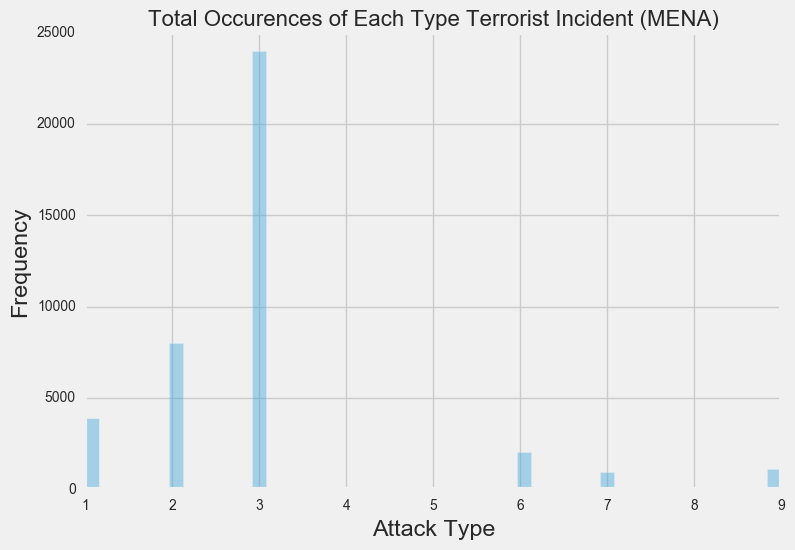

In [49]:
ax = sns.distplot(me_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency')
ax.set_title('Total Occurences of Each Type Terrorist Incident (MENA)', fontsize=16)
plt.show()

In [50]:
s_am_attks = gtd[gtd.region_txt=='South America']

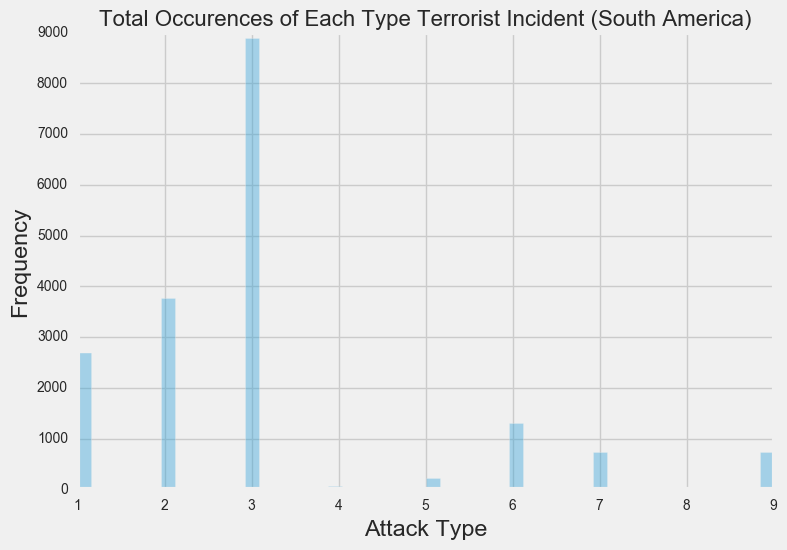

In [51]:
ax = sns.distplot(s_am_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency')
ax.set_title('Total Occurences of Each Type Terrorist Incident (South America)', fontsize=16)
plt.show()

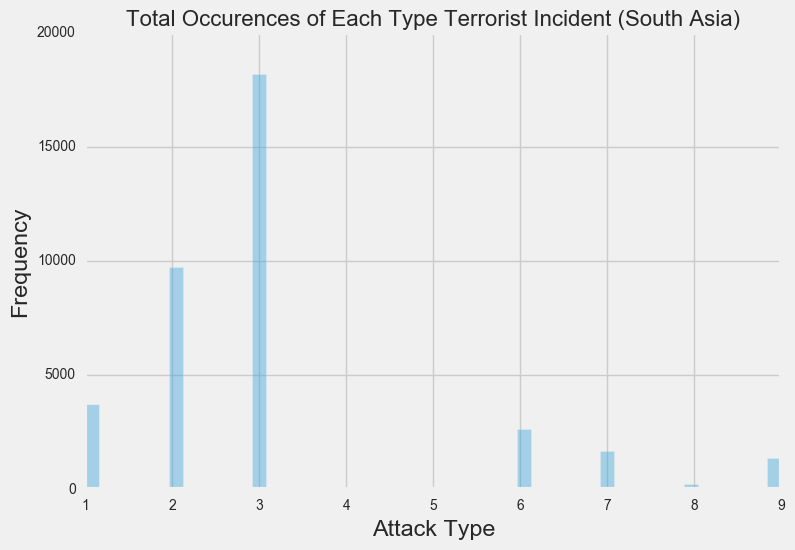

In [52]:
sa_attks = gtd[gtd.region_txt=='South Asia']
ax = sns.distplot(sa_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency')
ax.set_title('Total Occurences of Each Type Terrorist Incident (South Asia)', fontsize=16)
plt.show()

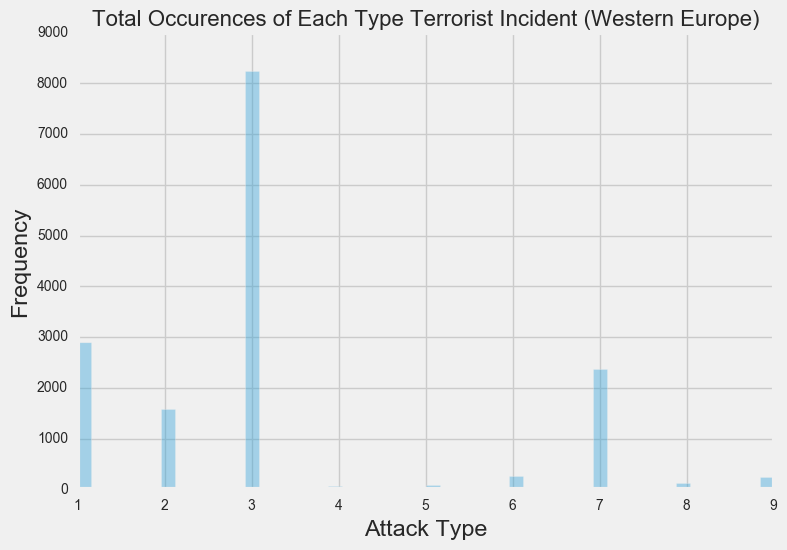

In [53]:
we_attks = gtd[gtd.region_txt=='Western Europe']
ax = sns.distplot(we_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency')
ax.set_title('Total Occurences of Each Type Terrorist Incident (Western Europe)', fontsize=16)
plt.show()

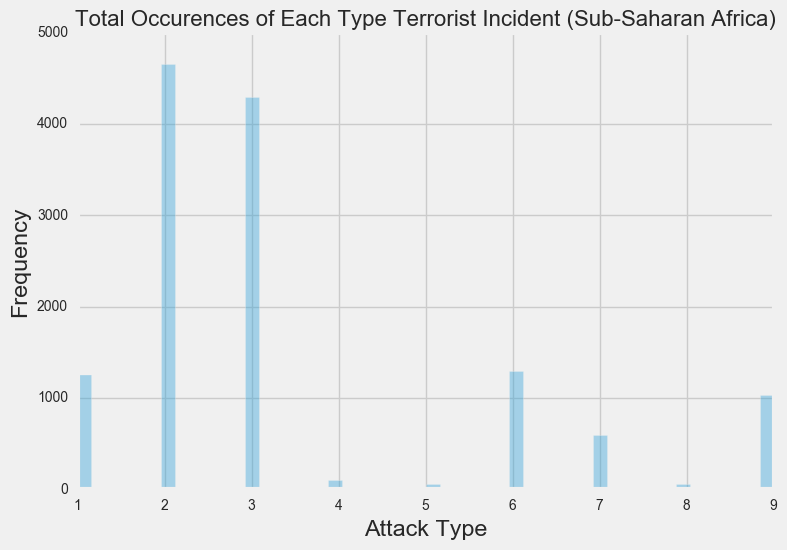

In [54]:
sub_af_attks = gtd[gtd.region_txt=='Sub-Saharan Africa']
ax = sns.distplot(sub_af_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency')
ax.set_title('Total Occurences of Each Type Terrorist Incident (Sub-Saharan Africa)', fontsize=16)
plt.show()
#Only one two show higher armed assaults than bombings. 

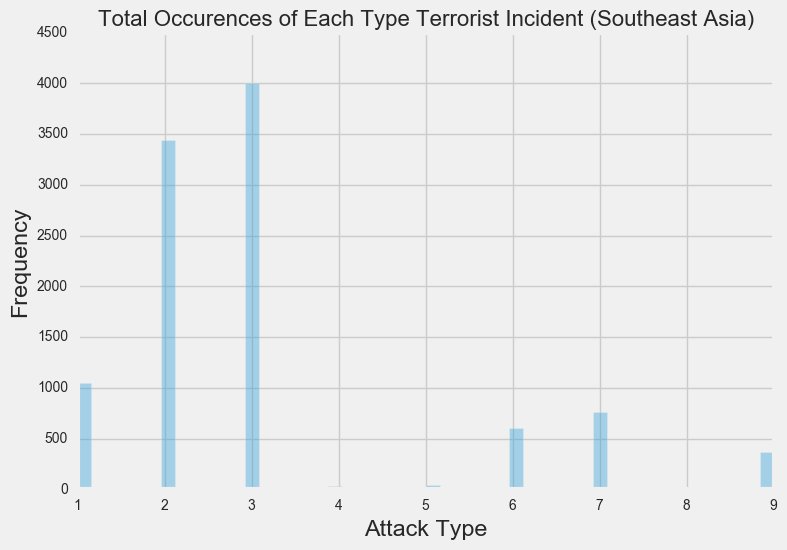

In [55]:
sea_attks = gtd[gtd.region_txt=='Southeast Asia']
ax = sns.distplot(sea_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency')
ax.set_title('Total Occurences of Each Type Terrorist Incident (Southeast Asia)', fontsize=16)
plt.show()

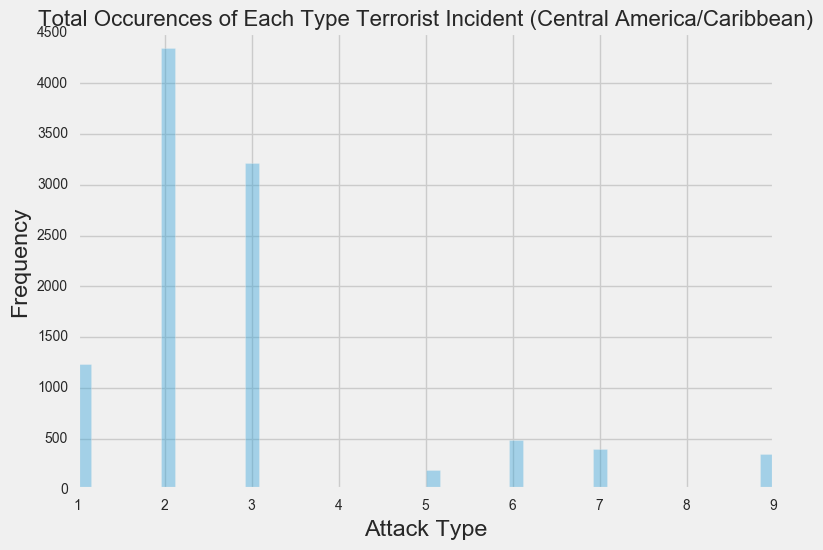

In [56]:
cac_attks = gtd[gtd.region_txt=='Central America & Caribbean']
ax = sns.distplot(cac_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency')
ax.set_title('Total Occurences of Each Type Terrorist Incident (Central America/Caribbean)', fontsize=16)
plt.show()

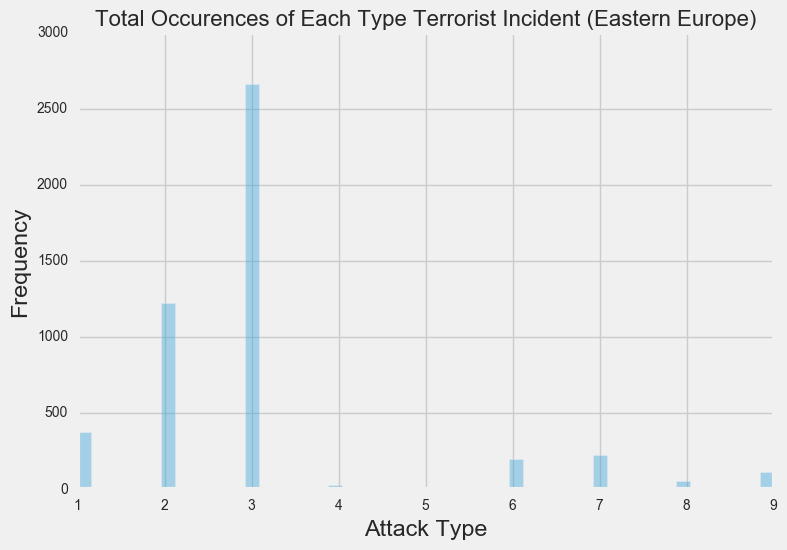

In [57]:
ee_attks = gtd[gtd.region_txt=='Eastern Europe']
ax = sns.distplot(ee_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency')
ax.set_title('Total Occurences of Each Type Terrorist Incident (Eastern Europe)', fontsize=16)
plt.show()

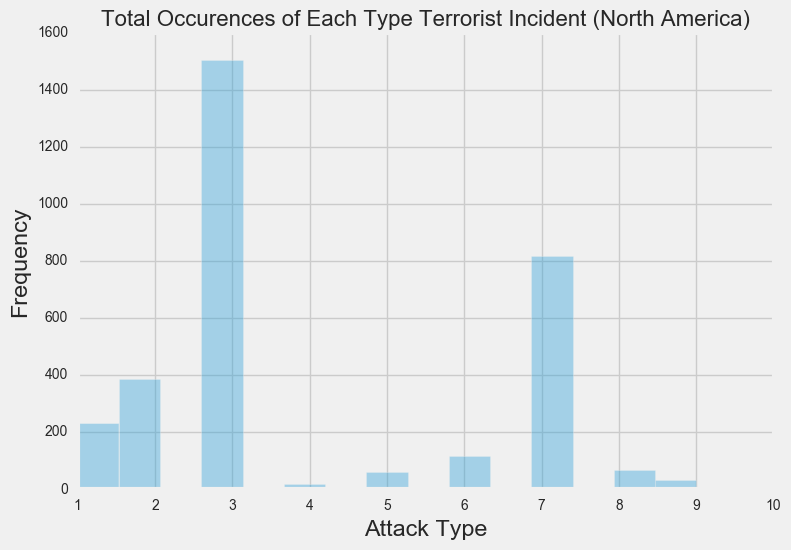

In [58]:
na_attks = gtd[gtd.region_txt=='North America']
ax = sns.distplot(na_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency')
ax.set_title('Total Occurences of Each Type Terrorist Incident (North America)', fontsize=16)
plt.show()

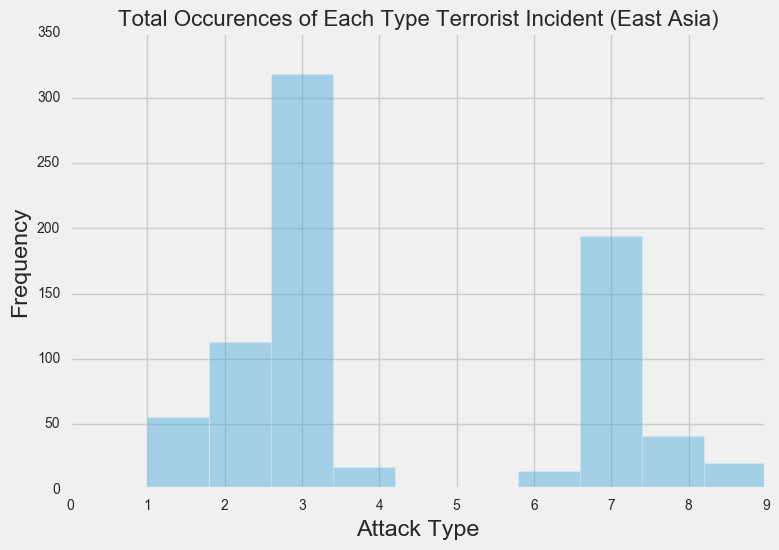

In [59]:
ea_attks = gtd[gtd.region_txt=='East Asia']
ax = sns.distplot(ea_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency')
ax.set_title('Total Occurences of Each Type Terrorist Incident (East Asia)', fontsize=16)
plt.show()

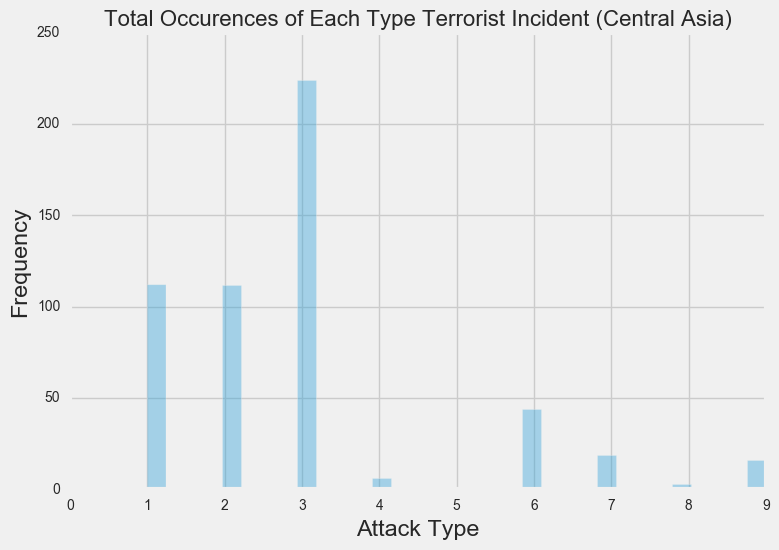

In [60]:
ca_attks = gtd[gtd.region_txt=='Central Asia']
ax = sns.distplot(ca_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency')
ax.set_title('Total Occurences of Each Type Terrorist Incident (Central Asia)', fontsize=16)
plt.show()

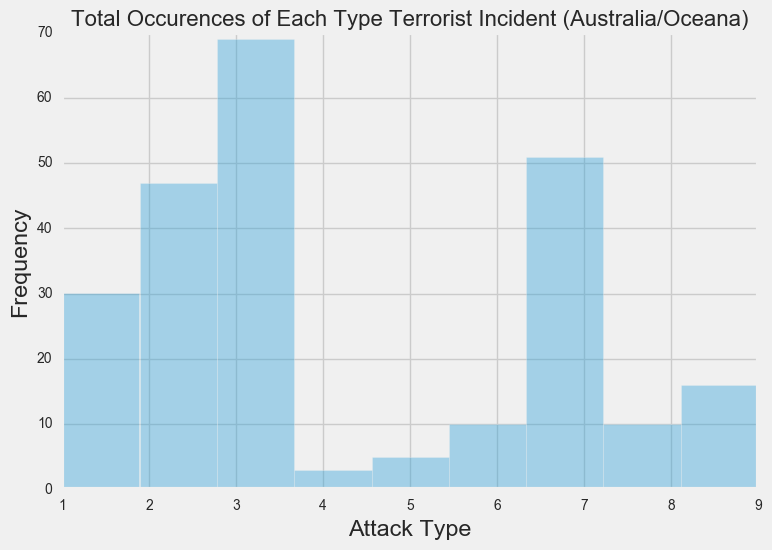

In [61]:
ao_attks = gtd[gtd.region_txt=='Australasia & Oceania']
ax = sns.distplot(ao_attks.attacktype1, kde=False, bins=9)
ax.set(xlabel='Attack Type', ylabel='Frequency')
ax.set_title('Total Occurences of Each Type Terrorist Incident (Australia/Oceana)', fontsize=16)
plt.show()

In [28]:
# The most frequent attack across all regions is bombings, except for Sub-Saharan
# Africa and Central America/The Caribbean, where armed assualt is more relatively frequent. 
# In North America, Australia/Oceania, and Western Europe, facility/infrastructure attacks
# are more frequent than in other areas. This makes sense, as these regions are generally 
# more developed than others in terms of urban infrastructure. 

In [40]:
me_attks.groupby('attacktype1').year.count()

attacktype1
1     3863
2     8017
3    23992
4      118
5       79
6     2014
7      917
8      143
9     1122
Name: year, dtype: int64

In [41]:
me_attks['armed_assault'] = me_attks.apply(lambda x: 1 if x['attacktype1'] == 2 else 0, axis=1)
me_attks['bombings'] = me_attks.apply(lambda x: 1 if x['attacktype1'] == 3 else 0, axis=1)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [42]:
me_attks.head()

,year,month,day,approxdate,extended,resolution,country,country_txt,region,region_txt,...,nhostkid,nhostkidus,nhours,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,armed_assault,bombings
95,1970,2,28,NaN,0,NaN,102,Jordan,10,Middle East & North Africa,...,NaN,NaN,NaN,-9,-9,0,-9,NaN,1,0
133,1970,3,14,NaN,0,NaN,60,Egypt,10,Middle East & North Africa,...,NaN,NaN,NaN,-9,-9,0,-9,NaN,0,1
158,1970,3,29,NaN,0,NaN,110,Lebanon,10,Middle East & North Africa,...,NaN,NaN,NaN,0,1,1,1,NaN,0,1
195,1970,4,15,NaN,0,NaN,102,Jordan,10,Middle East & North Africa,...,NaN,NaN,NaN,0,1,1,1,NaN,0,1
226,1970,4,25,NaN,0,NaN,209,Turkey,10,Middle East & North Africa,...,NaN,NaN,NaN,1,0,1,1,NaN,0,1


In [43]:
me_attks_grouped_by_year = me_attks.groupby('year').sum()

In [44]:
me_attks_grouped_by_year = me_attks_grouped_by_year.reset_index()

In [45]:
me_attks_grouped_by_year.head()

,year,month,day,extended,country,region,latitude,longitude,specificity,vicinity,...,ishostkid,nhostkid,nhostkidus,nhours,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,armed_assault,bombings
0,1970,201,379,4,3873,260,938.066691,925.852406,26,0,...,6.0,67.0,2.0,22.0,-61,-49,21,3,3,14
1,1971,246,735,3,9250,520,1843.104989,1730.684872,67,0,...,7.0,-190.0,5.0,17.0,-170,-144,37,-33,6,35
2,1972,199,586,2,4245,340,1215.588295,1375.813205,34,0,...,7.0,-312.0,0.0,0.0,-215,-207,19,-87,2,22
3,1973,89,282,2,2057,190,647.383890,646.939773,22,0,...,2.0,-49.0,50.0,0.0,-50,-42,17,9,2,14
4,1974,292,666,3,5021,410,1374.053305,1657.122109,41,0,...,9.0,82.0,0.0,0.0,-106,-99,25,-21,3,26


In [62]:
me_bombs_1st_q = me_attks_grouped_by_year[me_attks_grouped_by_year.bombings <= 174]
me_bombs_4th_q = me_attks_grouped_by_year[me_attks_grouped_by_year.bombings >= 269]

In [63]:
me_aa_1st_q = me_attks_grouped_by_year[me_attks_grouped_by_year.armed_assault <= 35]
me_aa_4th_q = me_attks_grouped_by_year[me_attks_grouped_by_year.armed_assault >= 204]

In [68]:
sub_af_attks['armed_assault'] = sub_af_attks.apply(lambda x: 1 if x['attacktype1'] == 2 else 0, axis=1)
sub_af_attks['bombings'] = sub_af_attks.apply(lambda x: 1 if x['attacktype1'] == 3 else 0, axis=1)
sub_af_attks_grouped_by_year = sub_af_attks.groupby('year').sum()
sub_af_attks_grouped_by_year = sub_af_attks_grouped_by_year.reset_index()

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


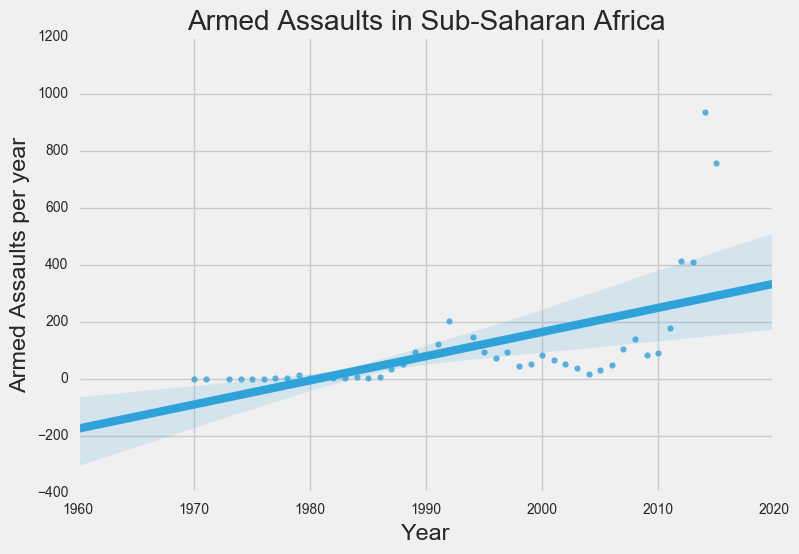

In [69]:
ax = sns.regplot(x=sub_af_attks_grouped_by_year.year, y=sub_af_attks_grouped_by_year.armed_assault, data=sub_af_attks_grouped_by_year)
ax.set(xlabel='Year', ylabel='Armed Assaults per year')
plt.title('Armed Assaults in Sub-Saharan Africa')
plt.show()

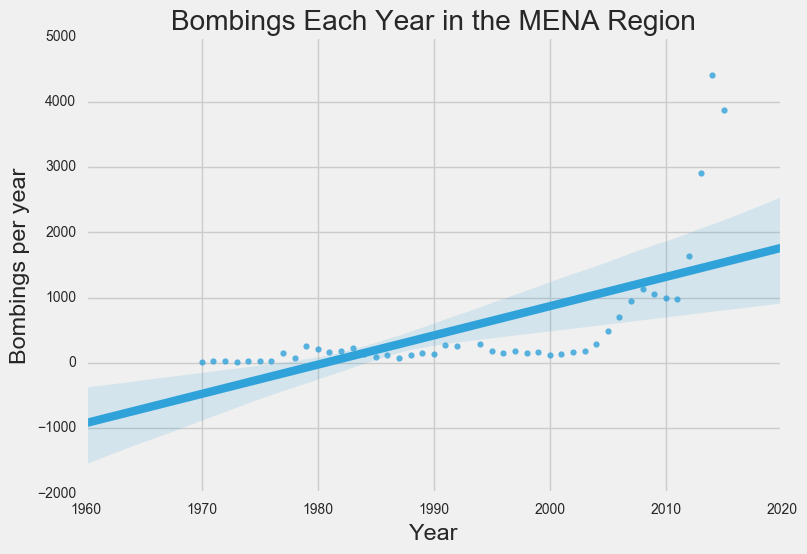

In [70]:
# Plotting bombings across years in the Middle East and Sub-Saharan Africa: 
ax = sns.regplot(x=me_attks_grouped_by_year.year, y=me_attks_grouped_by_year.bombings, data=me_attks_grouped_by_year)
ax.set(xlabel='Year', ylabel='Bombings per year')
plt.title('Bombings Each Year in the MENA Region')
plt.show()

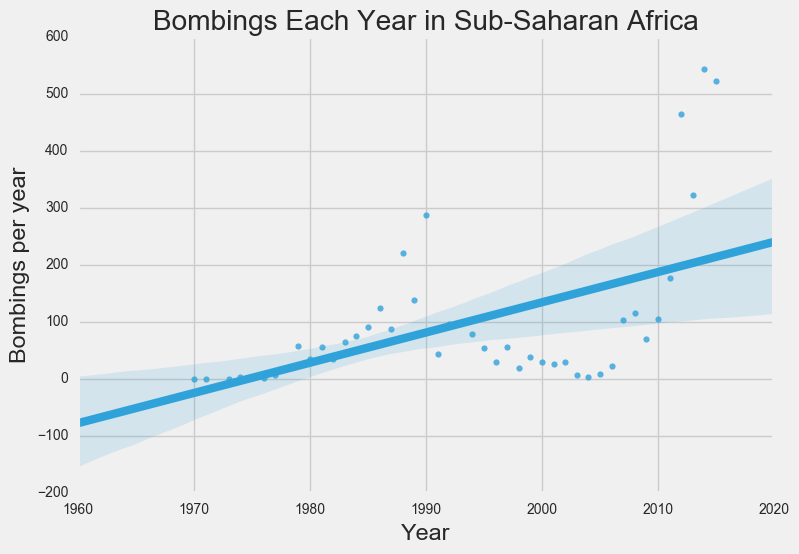

In [71]:
ax = sns.regplot(x=sub_af_attks_grouped_by_year.year, y=sub_af_attks_grouped_by_year.bombings, data=sub_af_attks_grouped_by_year)
ax.set(xlabel='Year', ylabel='Bombings per year')
plt.title('Bombings Each Year in Sub-Saharan Africa')
plt.show()

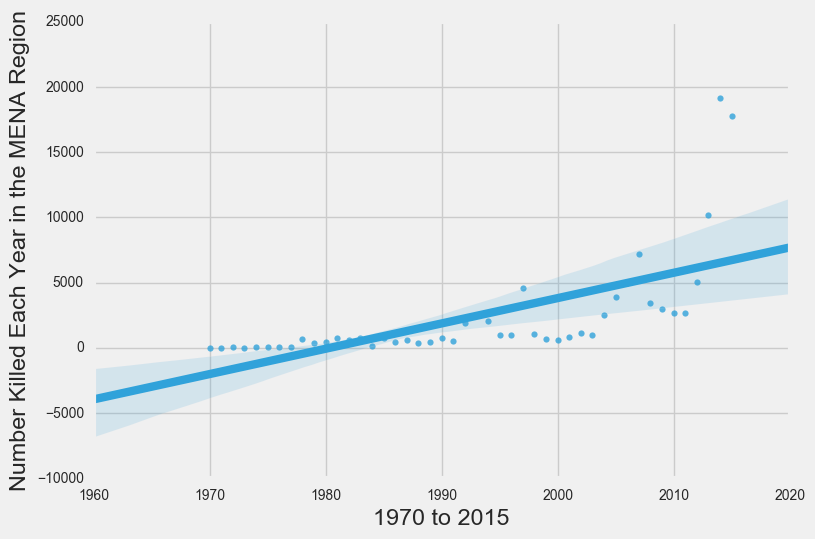

In [72]:
# Plotting Number killed in each region.
ax = sns.regplot(x=me_attks_grouped_by_year.year, y=me_attks_grouped_by_year.nkill, data=me_attks_grouped_by_year)
ax.set(xlabel='1970 to 2015', ylabel='Number Killed Each Year in the MENA Region')
plt.show()

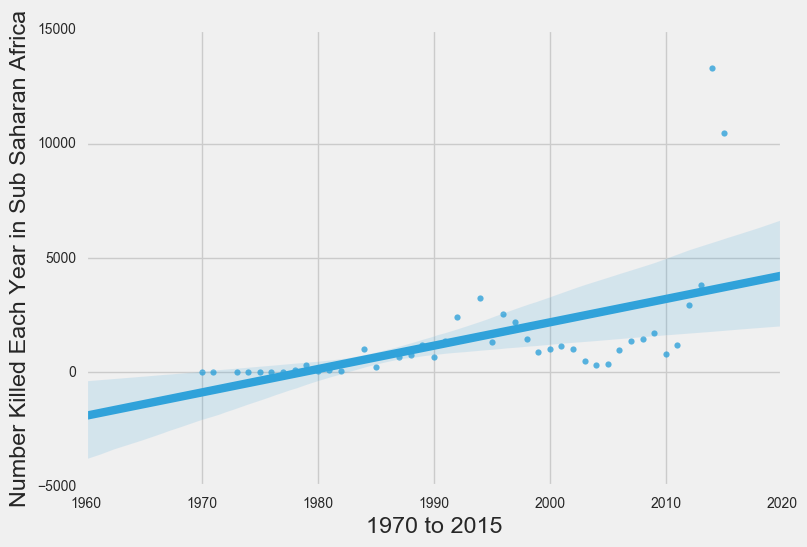

In [73]:
ax = sns.regplot(x=sub_af_attks_grouped_by_year.year, y=sub_af_attks_grouped_by_year.nkill, data=sub_af_attks_grouped_by_year)
ax.set(xlabel='1970 to 2015', ylabel='Number Killed Each Year in Sub Saharan Africa')
plt.show()

In [ ]:
#Let's compare the top five in Sub-Saharan Africa

In [74]:
sub_af_attks.country_txt.value_counts().head()

Nigeria         2888
Somalia         2872
South Africa    1950
Sudan            683
Kenya            515
Name: country_txt, dtype: int64

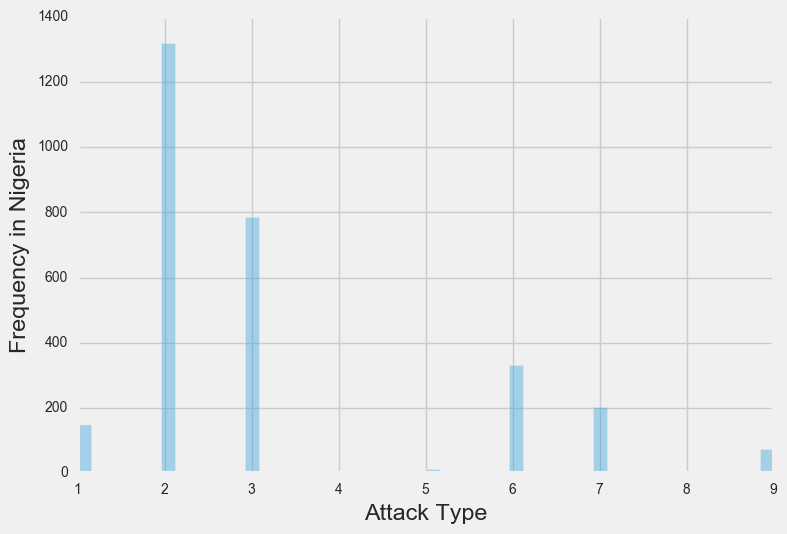

In [76]:
nigeria_attks = sub_af_attks[sub_af_attks.country_txt=='Nigeria']
ax = sns.distplot(nigeria_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency in Nigeria')
plt.show()

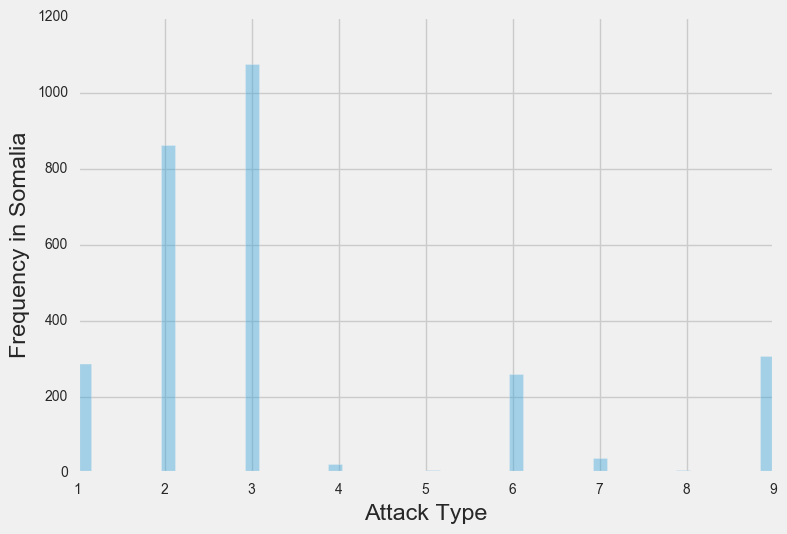

In [77]:
somalia_attks = sub_af_attks[sub_af_attks.country_txt=='Somalia']
ax = sns.distplot(somalia_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency in Somalia')
plt.show()
# Much higher frequency of bombings in Somalia than in Nigeria. 

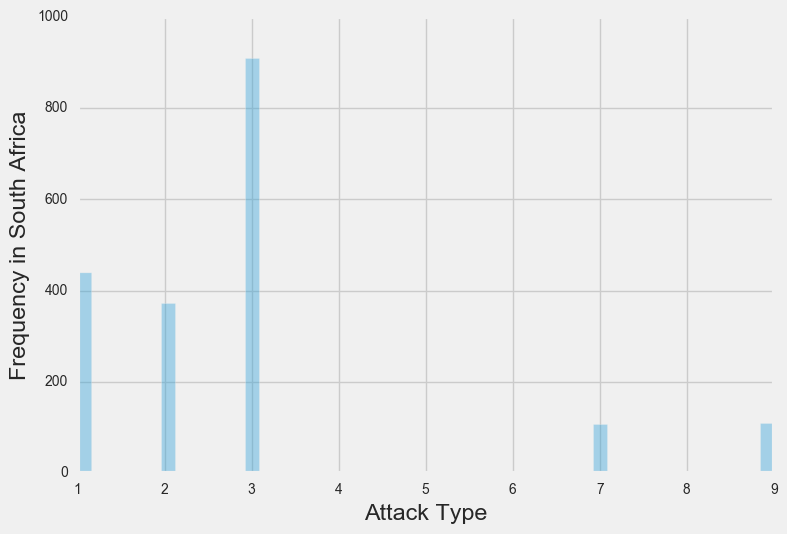

In [79]:
s_af_attks = sub_af_attks[sub_af_attks.country_txt=='South Africa']
ax = sns.distplot(s_af_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency in South Africa')
plt.show()

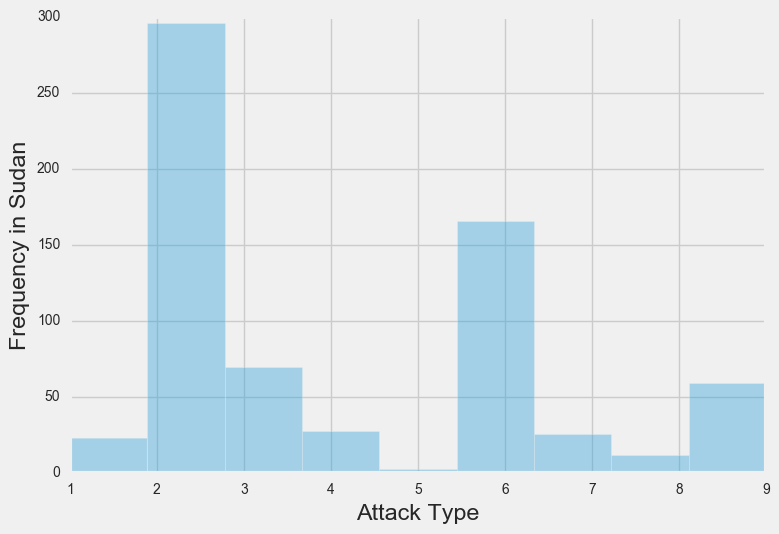

In [80]:
sudan_attks = sub_af_attks[sub_af_attks.country_txt=='Sudan']
ax = sns.distplot(sudan_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency in Sudan')
plt.show()

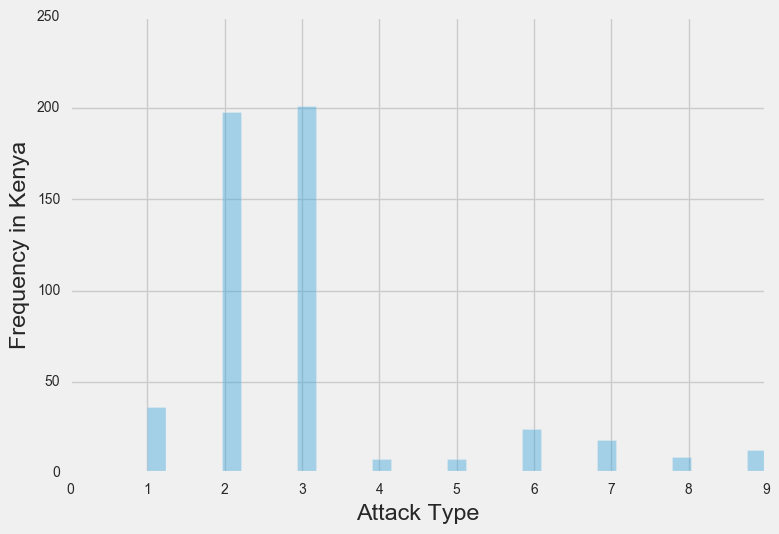

In [81]:
kenya_attks = sub_af_attks[sub_af_attks.country_txt=='Kenya']
ax = sns.distplot(kenya_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency in Kenya')
plt.show()
# Relatively equal bombings and armed assault. 

## Part 2: Bayesian Inference

In [72]:
# compare two populations. 
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pymc3 as pm

In [73]:
sub_af_attks['armed_assault'] = sub_af_attks.apply(lambda x: 1 if x['attacktype1'] == 2 else 0, axis=1)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [74]:
#Comparing populations in Somalia and Nigeria in the 2010s. 
sub_af_00s = sub_af_attks[sub_af_attks.year > 2001]

In [75]:
#Comparing populations in Somalia and Nigeria in the 2010s. 
sub_af_00s = sub_af_attks[sub_af_attks.year > 2001]
sub_af_00s = sub_af_00s[sub_af_00s.year < 2011] 

In [76]:
ni_00s = sub_af_00s[sub_af_00s.country_txt == 'Nigeria']
som_00s = sub_af_00s[sub_af_00s.country_txt == 'Somalia']

In [79]:
ni_00s = ni_00s[[0,1,2,4,8,12,13,17,18,19,66]]

In [80]:
som_00s = som_00s[[0,1,2,4,8,12,13,17,18,19,66]]

In [81]:
mean_prior_mean = sub_af_00s.armed_assault.mean()
mean_prior_std = sub_af_00s.armed_assault.std()

In [82]:
with pm.Model() as model:

    ni_mean = pm.Normal('Nigeria Armed Assaults Mean', mean_prior_mean, sd=mean_prior_std)
    som_mean = pm.Normal('Somalia Armed Assaults Mean', mean_prior_mean, sd=mean_prior_std)

In [83]:
std_prior_lower = 0.01
std_prior_upper = 100.0

with model:
    
    ni_std = pm.Uniform('Nigeria Armed Assaults Std', lower=std_prior_lower, upper=std_prior_upper)
    som_std = pm.Uniform('Somalia Armed Assaults Std', lower=std_prior_lower, upper=std_prior_upper)

In [84]:
with model:

    nigeria_group = pm.Normal('Nigeria Armed Assaults', mu=ni_mean, sd=ni_std, observed=ni_00s)
    som_group = pm.Normal('Somalia Armed Assaults', mu=som_mean, sd=som_std, observed=som_00s)

In [85]:
with model:

    diff_of_means = pm.Deterministic('difference of means', ni_mean - som_mean)
    diff_of_stds = pm.Deterministic('difference of stds', ni_std - som_std)
    effect_size = pm.Deterministic('effect size',
                                   diff_of_means / np.sqrt((ni_std**2 + som_std**2) / 2))

In [103]:
with model:
    trace = pm.sample(10000, njobs=-1)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -2.3629e+05: 100%|██████████| 200000/200000 [01:00<00:00, 3305.46it/s]
Finished [100%]: Average ELBO = -2.3629e+05
100%|██████████| 10000/10000 [01:08<00:00, 145.78it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11efdfcd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1213ae250>], dtype=object)

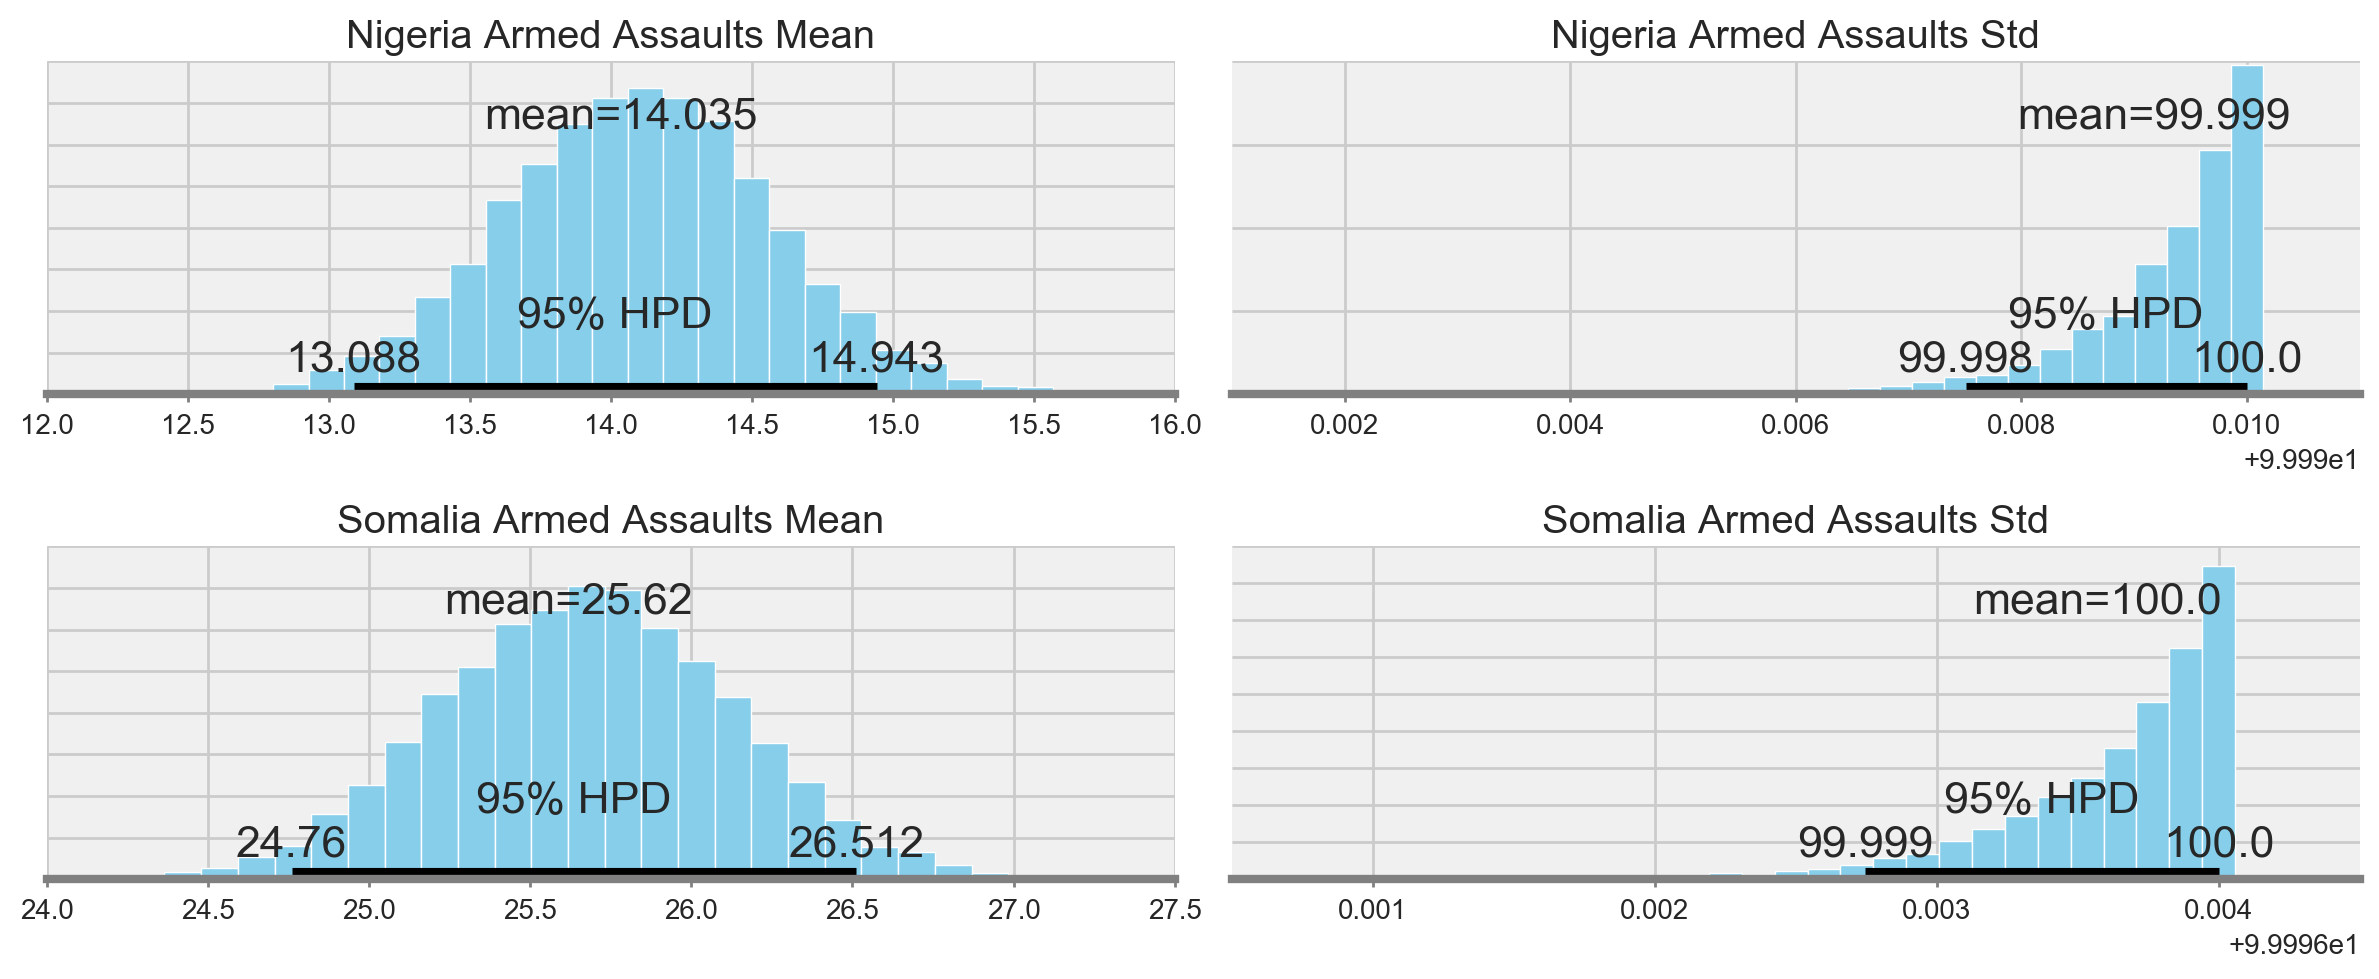

In [104]:
pm.plot_posterior(trace[3000:],
                  varnames=['Nigeria Armed Assaults Mean', 'Somalia Armed Assaults Mean', 'Nigeria Armed Assaults Std', 'Somalia Armed Assaults Std'],
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11ef03850>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11fabef90>], dtype=object)

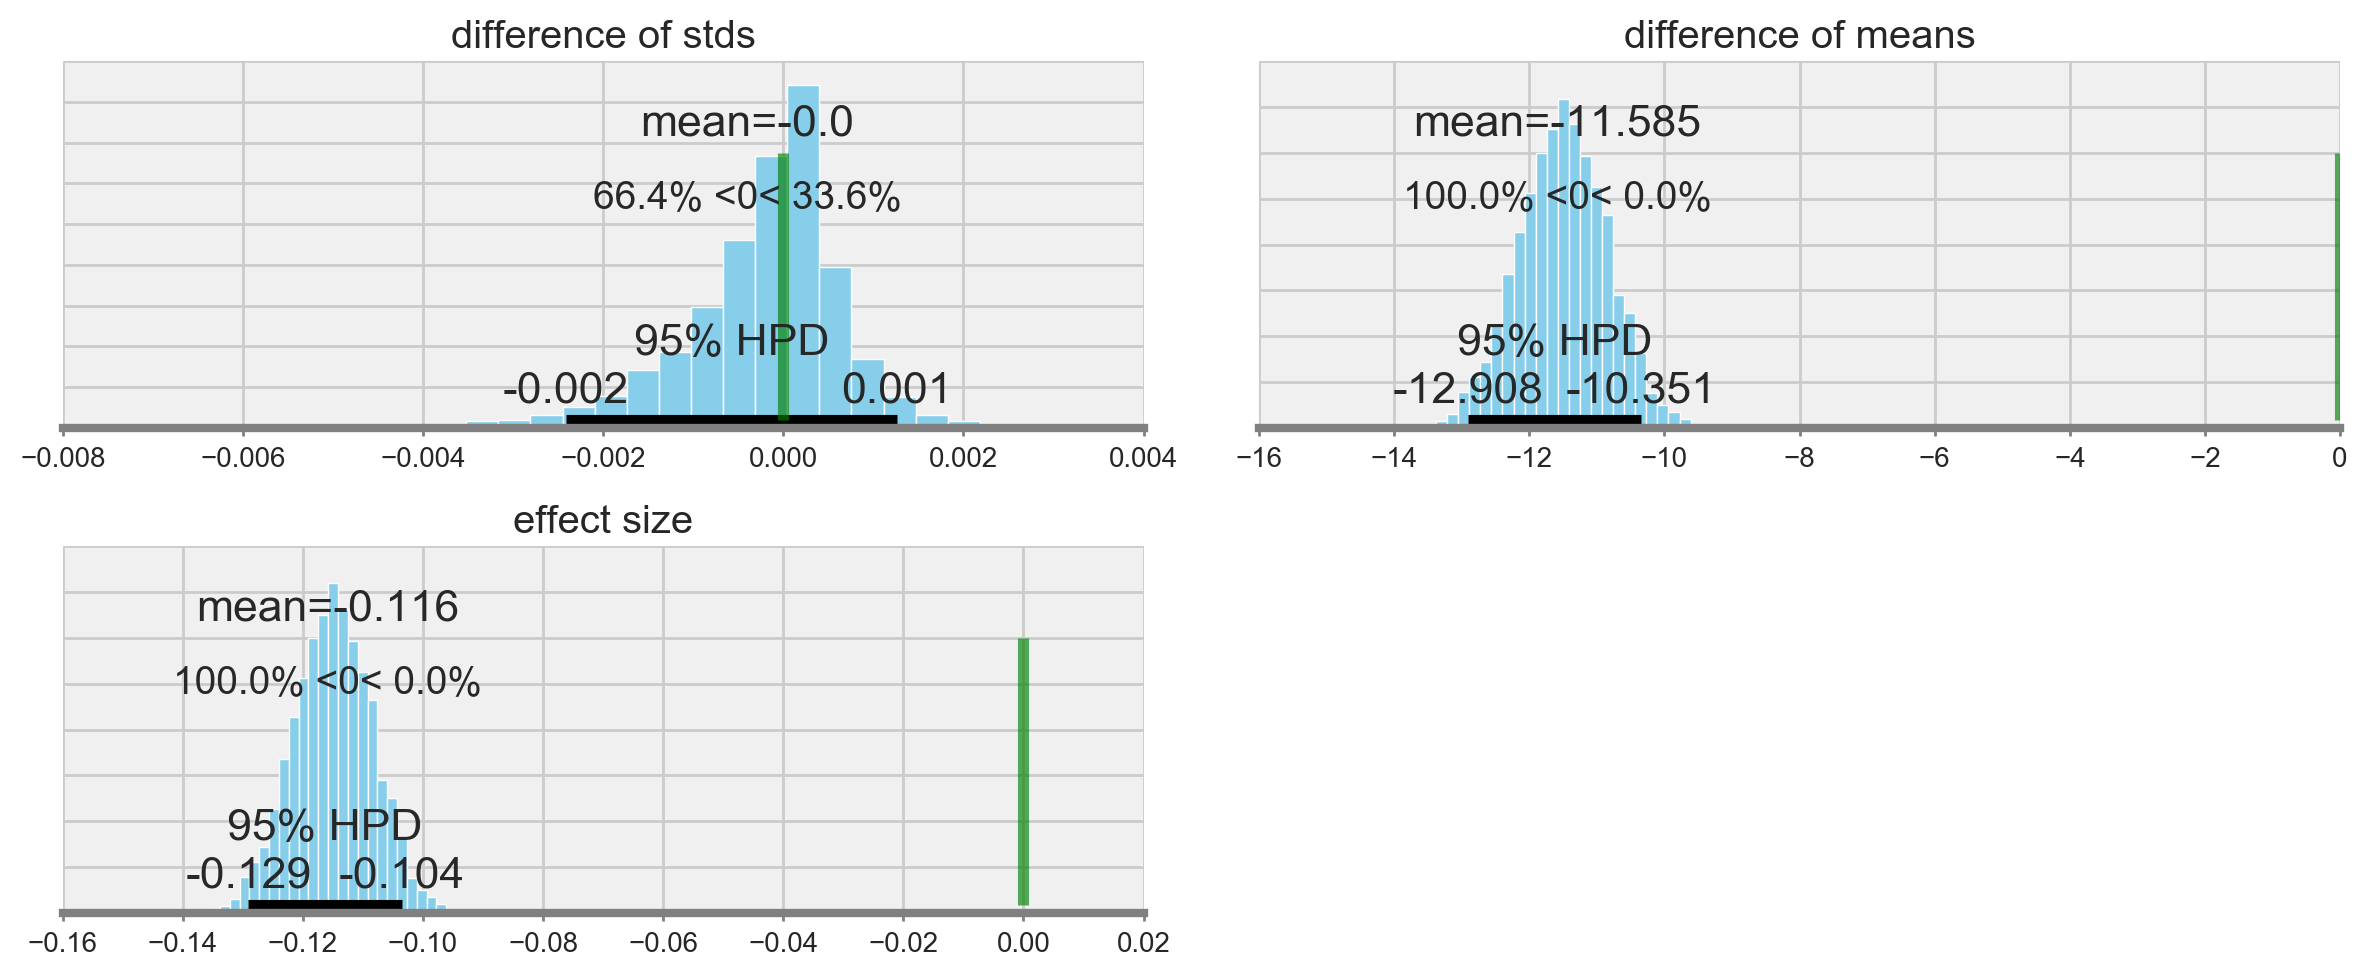

In [105]:
pm.plot_posterior(trace[3000:],
                  varnames=['difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

In [107]:
pm.summary(trace[3000:],
           varnames=['difference of means', 'difference of stds', 'effect size'])


difference of means:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -11.585          0.659            0.005            [-12.908, -10.351]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -12.888        -12.030        -11.586        -11.128        -10.324


difference of stds:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.000           0.001            0.000            [-0.002, 0.001]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.003         -0.001         -0.000         0.000          0.001


effect size:

  Mean             SD               MC Error         95% 

## Part 3: Predicting the bombings for the missing year 1993

In [108]:
#Drop the 73 null values for lat and long.

In [109]:
# Predicting for 1993. Might be best to look at the years before and after.
me_attks_b4 = me_attks[me_attks.year == 1992]
me_attks_aftr = me_attks[me_attks.year == 1994]
sub_af_attks_b4 = sub_af_attks[sub_af_attks.year == 1992]
sub_af_attks_aftr = sub_af_attks[sub_af_attks.year == 1994]

In [110]:
sub_af_attks_b4.head()

,year,month,day,approxdate,extended,resolution,country,country_txt,region,region_txt,...,nhostkid,nhostkidus,nhours,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,armed_assault,bombings
49575,1992,1,1,NaN,0,NaN,183,South Africa,11,Sub-Saharan Africa,...,NaN,NaN,NaN,-9,-9,0,-9,NaN,0,1
49579,1992,1,2,NaN,0,NaN,183,South Africa,11,Sub-Saharan Africa,...,NaN,NaN,NaN,0,0,0,0,NaN,0,0
49585,1992,1,2,NaN,0,NaN,183,South Africa,11,Sub-Saharan Africa,...,NaN,NaN,NaN,-9,-9,0,-9,NaN,0,1
49586,1992,1,2,NaN,0,NaN,183,South Africa,11,Sub-Saharan Africa,...,NaN,NaN,NaN,-9,-9,0,-9,NaN,0,1
49589,1992,1,2,NaN,0,NaN,183,South Africa,11,Sub-Saharan Africa,...,NaN,NaN,NaN,-9,-9,0,-9,NaN,1,0


In [111]:
sub_af_attks_aftr.head()

,year,month,day,approxdate,extended,resolution,country,country_txt,region,region_txt,...,nhostkid,nhostkidus,nhours,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,armed_assault,bombings
54647,1994,1,1,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,...,NaN,NaN,NaN,-9,-9,1,1,NaN,1,0
54648,1994,1,1,NaN,0,NaN,183,South Africa,11,Sub-Saharan Africa,...,NaN,NaN,NaN,-9,-9,0,-9,NaN,0,1
54673,1994,1,2,NaN,0,NaN,42,Chad,11,Sub-Saharan Africa,...,NaN,NaN,NaN,-9,-9,1,1,NaN,0,1
54680,1994,1,3,NaN,0,NaN,37,Cameroon,11,Sub-Saharan Africa,...,NaN,NaN,NaN,-9,-9,0,-9,NaN,0,1
54682,1994,1,3,NaN,0,NaN,84,Guinea,11,Sub-Saharan Africa,...,NaN,NaN,NaN,1,1,0,1,NaN,1,0


In [112]:
bombs_per_month_1 = sub_af_attks_b4.groupby('month').bombings.count()

In [113]:
bombs_per_month_2 = sub_af_attks_aftr.groupby('month').bombings.count()

In [114]:
bombs_per_month_93 = np.mean(np.array([bombs_per_month_1, bombs_per_month_2]), axis=0 )

In [115]:
bombs_per_month_93 = pd.DataFrame(bombs_per_month_93)

In [117]:
bombs_per_country_1 = sub_af_attks_b4.groupby('country_txt').bombings.count()

In [118]:
bombs_per_country_2 = sub_af_attks_aftr.groupby('country_txt').bombings.count()

In [119]:
bombs_per_country_1 = pd.DataFrame(bombs_per_country_1)

In [120]:
bombs_per_country_2 = pd.DataFrame(bombs_per_country_2)

In [121]:
bombs_per_county_93 = pd.concat((bombs_per_country_1, bombs_per_country_2))
bombs_per_county_93.groupby(bombs_per_county_93.index).mean()
# Estimations of bombings in Sub-Saharan African nations in 1993 

,bombings
country_txt,
Angola,25.0
Benin,2.0
Burundi,9.0
Cameroon,6.0
Central African Republic,1.0
Chad,2.5
Comoros,1.0
Djibouti,4.0
Equatorial Guinea,1.0
